<a href="https://colab.research.google.com/github/PradeepKumarM30/WinterSemester2020-21/blob/DeepLearning/20MAI0030EX1/QNO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# M Pradeep Kumar 20MAI0030
# Load necesssary imports required for this question 
import sklearn.datasets
import pandas as pd
import numpy as np
import csv
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
#STEP 1 : Load input dataset
input_data = sklearn.datasets.load_wine()

In [6]:
#Step 2 : Assign it to feature vector
feature_vector = pd.DataFrame(input_data.data,columns=input_data.feature_names)

In [7]:
#Step 3 : Store the target variables in target vector 
target_vector = pd.DataFrame(input_data.target,columns = ['Target'])

In [8]:
# Visualising the data
feature_vector

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [9]:
#Convert the dataframe to a numpy array for processing the data
X_feautures = feature_vector.to_numpy()


In [10]:
#Verifying the dimensions
X_feautures.shape

(178, 13)

In [11]:
Y_feautures = target_vector.to_numpy()


In [12]:
Y_feautures.shape

(178, 1)

In [15]:
#Loadint the X and Y variables for performing the operations on model
X = X_feautures[:,0:12].astype(float)
Y = Y_feautures[:,0]
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)


In [16]:
#Code the model for the data which is a multi layer perceptron implemented using the keras package
def dev_model():
  model = Sequential()
  model.add(Dense(8, input_dim=12, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [17]:
#Classfiy usong the esitmator of keras package -- NOTE : THE ERRORS ARE RECTIFIED IN THE FOLLOWING CELLS AND HENCE THERE SHOULD BE NO ERRORS WHILE CHECKING
#It acheives 75% accuracy .. but if stopped earlier it can acheive upto 92% whose results can be seen if scrolled in the output cell of this portion
estimator = KerasClassifier(build_fn=dev_model, epochs=200)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 28.2239 - accuracy: 0.3326
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 30.6352 - accuracy: 0.2089
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 27.2004 - accuracy: 0.0682
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 28.4392 - accuracy: 0.2493
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 27.3757 - accuracy: 0.3446
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 24.5844 - accuracy: 0.3176
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 29.0261 - accuracy: 0.1674
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 24.6261 - accuracy: 0.1028
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 22.3401 - accuracy: 0.0951
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 21.6877 - accuracy: 0.1096
Epoch 11/200
5/5 [=

NameError: ignored

In [19]:
#Validation using the validation dataset
# 88% of validation accuracy is a good thing!
y_pred = cross_val_predict(estimator, X, Y, cv=10)


Epoch 1/200
5/5 [==============================] - 0s 2ms/step - loss: 14.2014 - accuracy: 0.3530
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 15.5406 - accuracy: 0.2654
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 14.8434 - accuracy: 0.2602
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 12.9622 - accuracy: 0.2832
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 12.0741 - accuracy: 0.2536
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 10.7490 - accuracy: 0.3170
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 10.3172 - accuracy: 0.3296
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 9.7558 - accuracy: 0.2914
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 7.9608 - accuracy: 0.3118
Epoch 10/200
5/5 [==============================] - 0s 2ms/step - loss: 7.0617 - accuracy: 0.3491
Epoch 11/200
5/5 [====

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5/5 [==============================] - 0s 2ms/step - loss: 25.5540 - accuracy: 0.2412
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 22.8392 - accuracy: 0.2868
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 21.8164 - accuracy: 0.2729
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 20.9844 - accuracy: 0.2486
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 20.0748 - accuracy: 0.2451
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 18.6490 - accuracy: 0.2560
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 16.3877 - accuracy: 0.2755
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 15.6496 - accuracy: 0.2512
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 14.1675 - accuracy: 0.2543
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 11.3449 - accuracy: 0.2747
Epoch 11/200
5/5 [=============

NameError: ignored

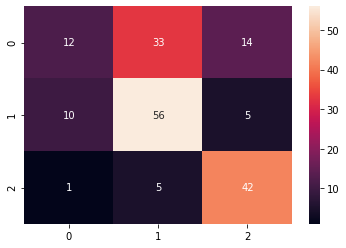

In [23]:
#Converting the confusion matrix to heat map for better visualisation
conf_mat = confusion_matrix(Y, y_pred)
sns.heatmap(conf_mat,annot = True)

In [ ]:
#NOTE : THERE IS NO SPECIFIC DATASET FOR THIS QUESTION AS IT IS OBTAINED FROM THE SKLEARN PACKAGE